In [12]:
import os
import re
import json
import hikinggc
import rasterio
from rasterio.plot import show as rioshow
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
import logging
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
from importlib import reload
reload(hikinggc)
matplotlib.style.use("./hiking.mplstyle")

In [13]:
logger = logging.getLogger("populationCanary")
logger.setLevel(logging.WARN)
logging.info("")

In [14]:
datafile = os.path.join(hikinggc.datadir, "Presas.kml")
municipiosfile = os.path.join(hikinggc.datadir, "municipiosGC.json")
logger.info("Creating projection")
GC = hikinggc.Island(coordinates=hikinggc.gccoords)

## Load data

In [15]:
presas = hikinggc.Presas()
presas.get_from_file(datafile)
municipios = hikinggc.Municipios()
municipios.get_from_json(municipiosfile)
visfile1 = "./GC_cartoDB.tif"
vis = hikinggc.Visible()
vis.read_geotiff(visfile1)

In [16]:
with rasterio.open("./GC_cartoDB2.tif") as r:
    visib = r.read()
    visib = np.transpose(visib, [1,2,0])

### Simple histogram to get an idea

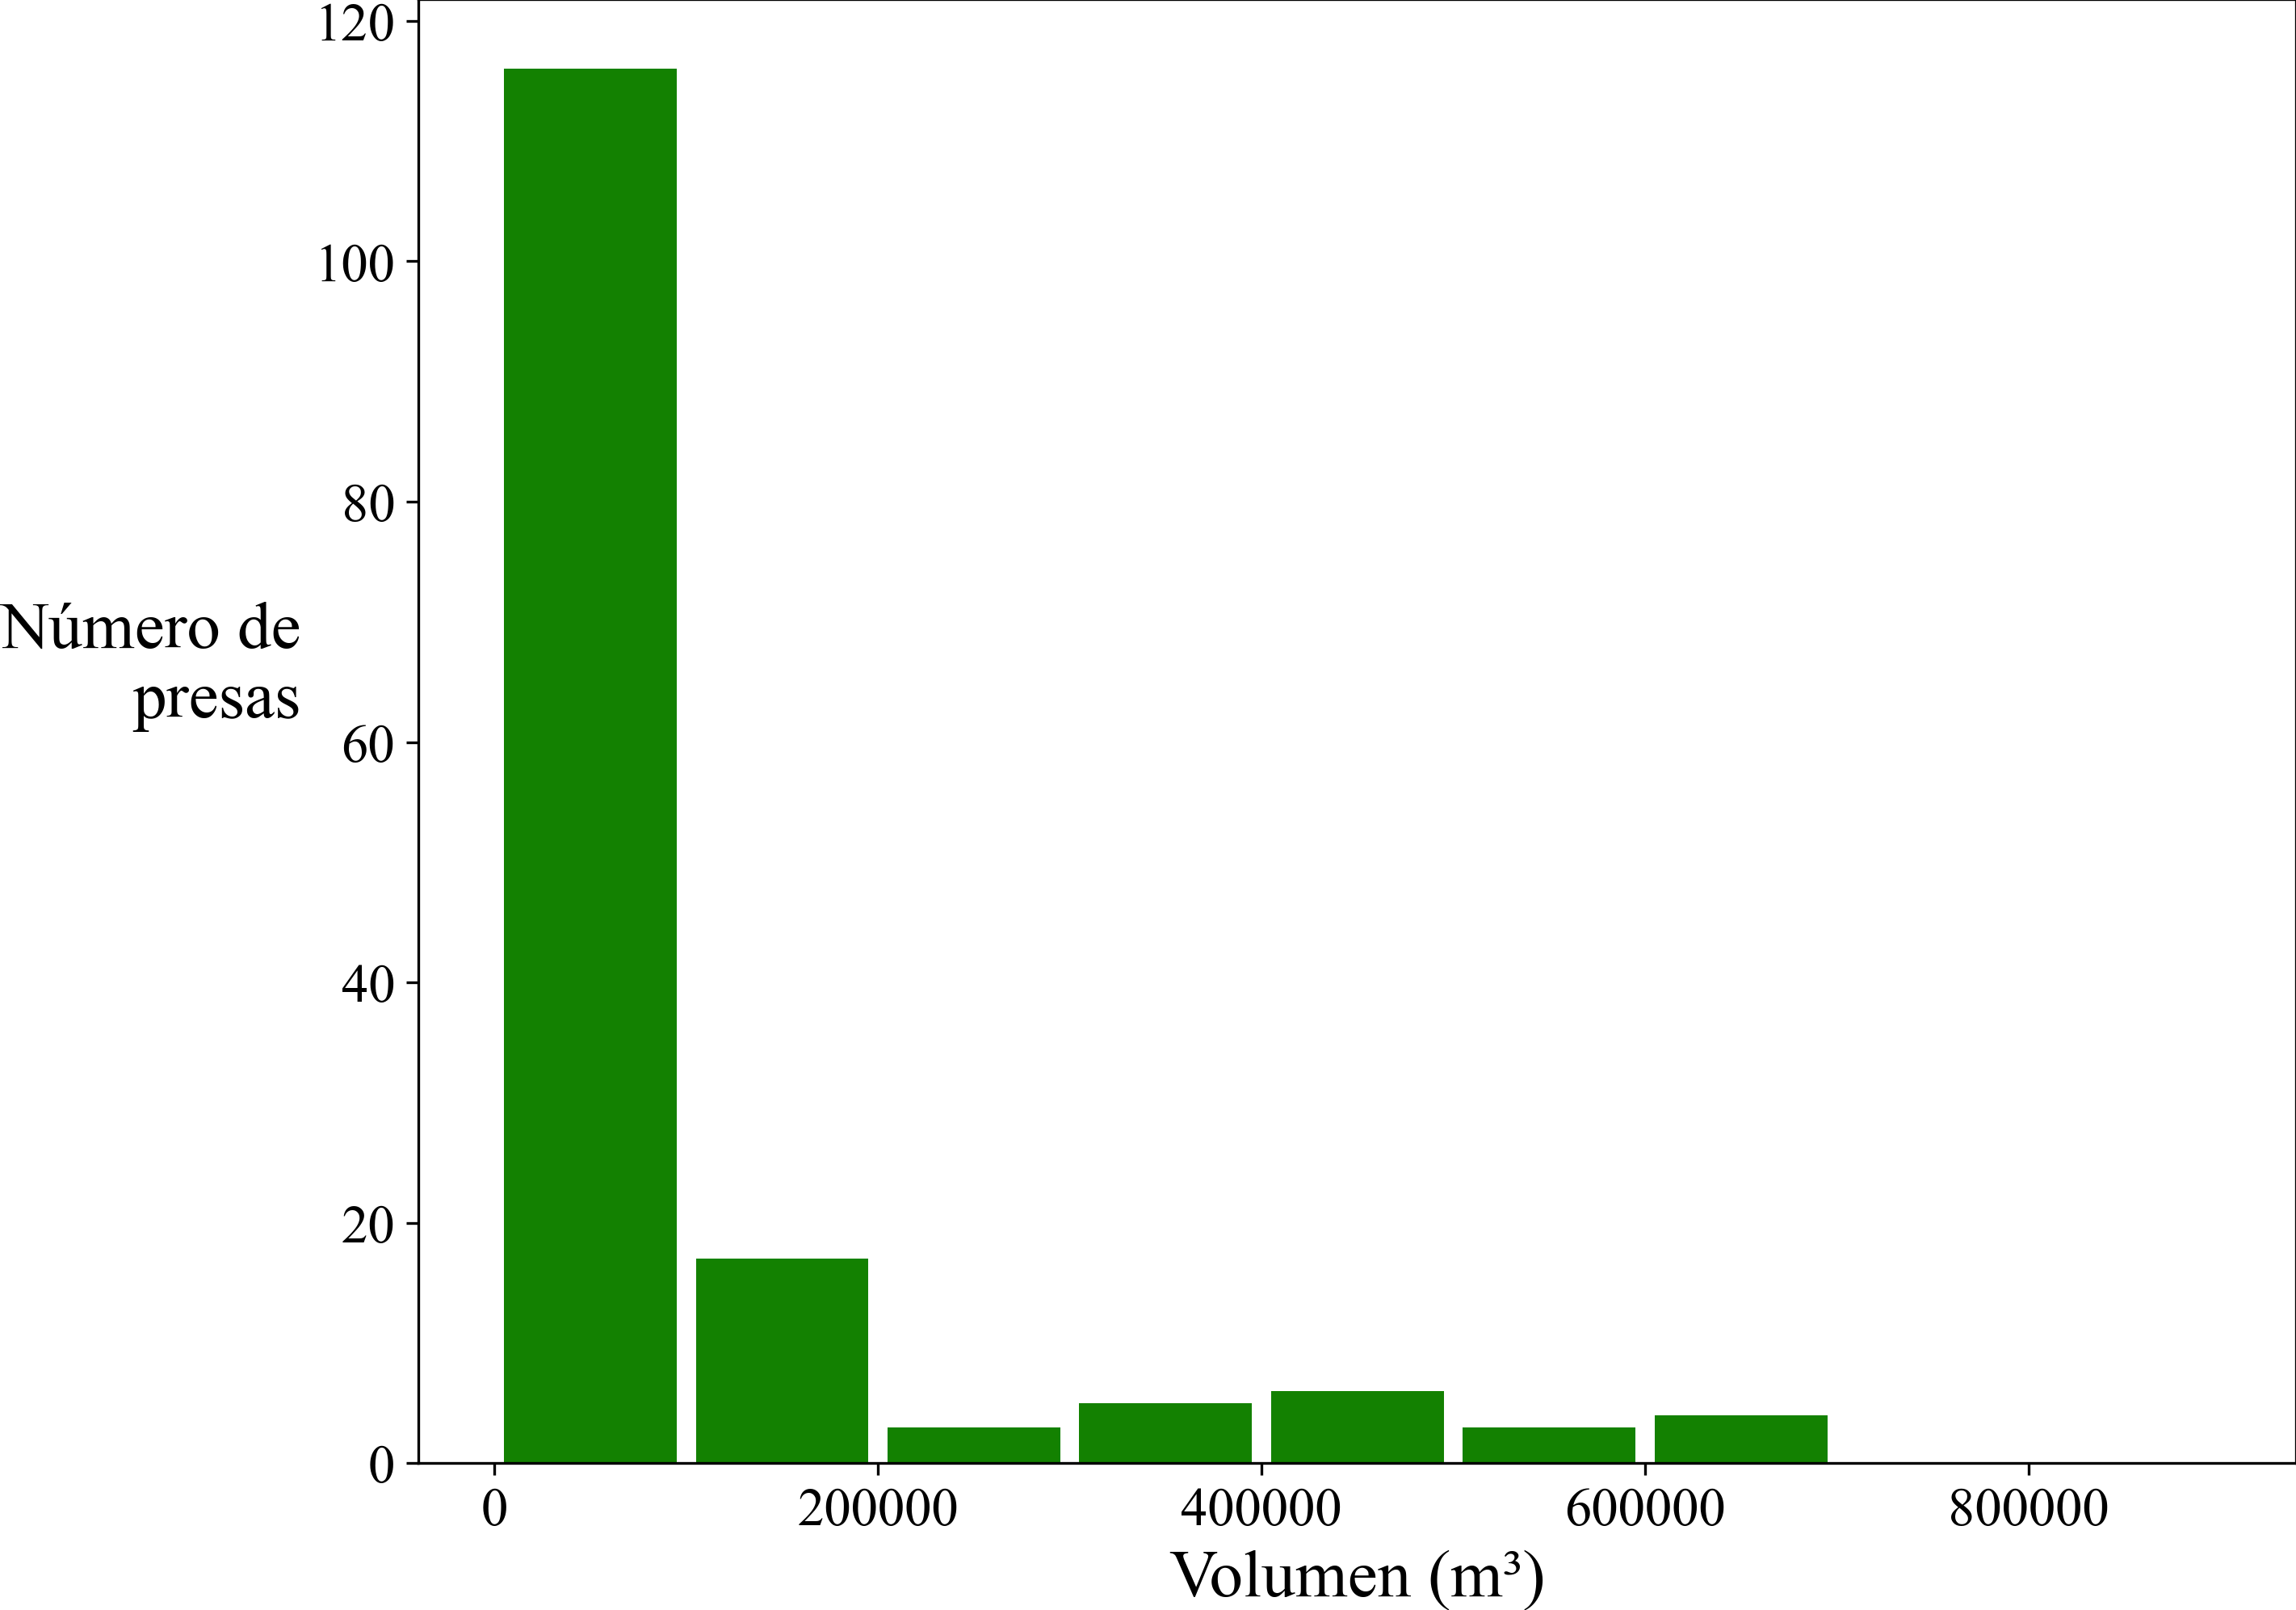

In [6]:
plt.figure()
ax = plt.subplot(111)
hh = plt.hist(presas.capacity, bins=1e6 * np.arange(0., 1., 0.1), rwidth=.9, color=hikinggc.maingreen)
plt.ylabel("Número de\npresas", ha="right", rotation=0)
plt.xlabel("Volumen (m³)")
plt.savefig(os.path.join(hikinggc.figdir, "presas_histogram.jpg"))
plt.show()
plt.close()

In [7]:
lims = [10000, 50000, 100000, 1000000]
colorlist = ["#FFFB33", "#FFAF29", "#FF2505", "k"]
colors, sizes = presas.get_color_size(lims, colorlist)

## Plot

In [10]:
fig = plt.figure(figsize=(10, 8))

ax = plt.subplot(111, projection=hikinggc.main_crs)

#municipios.add_to_plot(ax, color='w', linewidth=1, zorder=2)
municipios.add_to_plot(ax, color='.5', linewidth=.5, zorder=3)
        
presas.add_to_plot(ax, colors, sizes, markeredgecolor='k', zorder=4)
presas.add_legend(ax, lims, colorlist)

ax.spines['geo'].set_color("w")
    
# vis.add_to_plot(ax, proj=hikinggc.data_crs)
ax.imshow(vis.image, origin='upper', extent=vis.extent, transform=ccrs.epsg(3857))

ax.set_extent(GC.coordinates)
ax.spines['geo'].set_color("w")

plt.savefig(os.path.join(hikinggc.figdir, "presas_sat4.pdf"), transparent=False, dpi=300,
            edgecolor='white', bbox_inches='tight', pad_inches=0)
plt.savefig(os.path.join(hikinggc.figdir, "presas_sat4.jpg"), transparent=False, dpi=300,
            edgecolor='white', bbox_inches='tight', pad_inches=0)


# plt.show()
plt.close()

## Plot presas contours

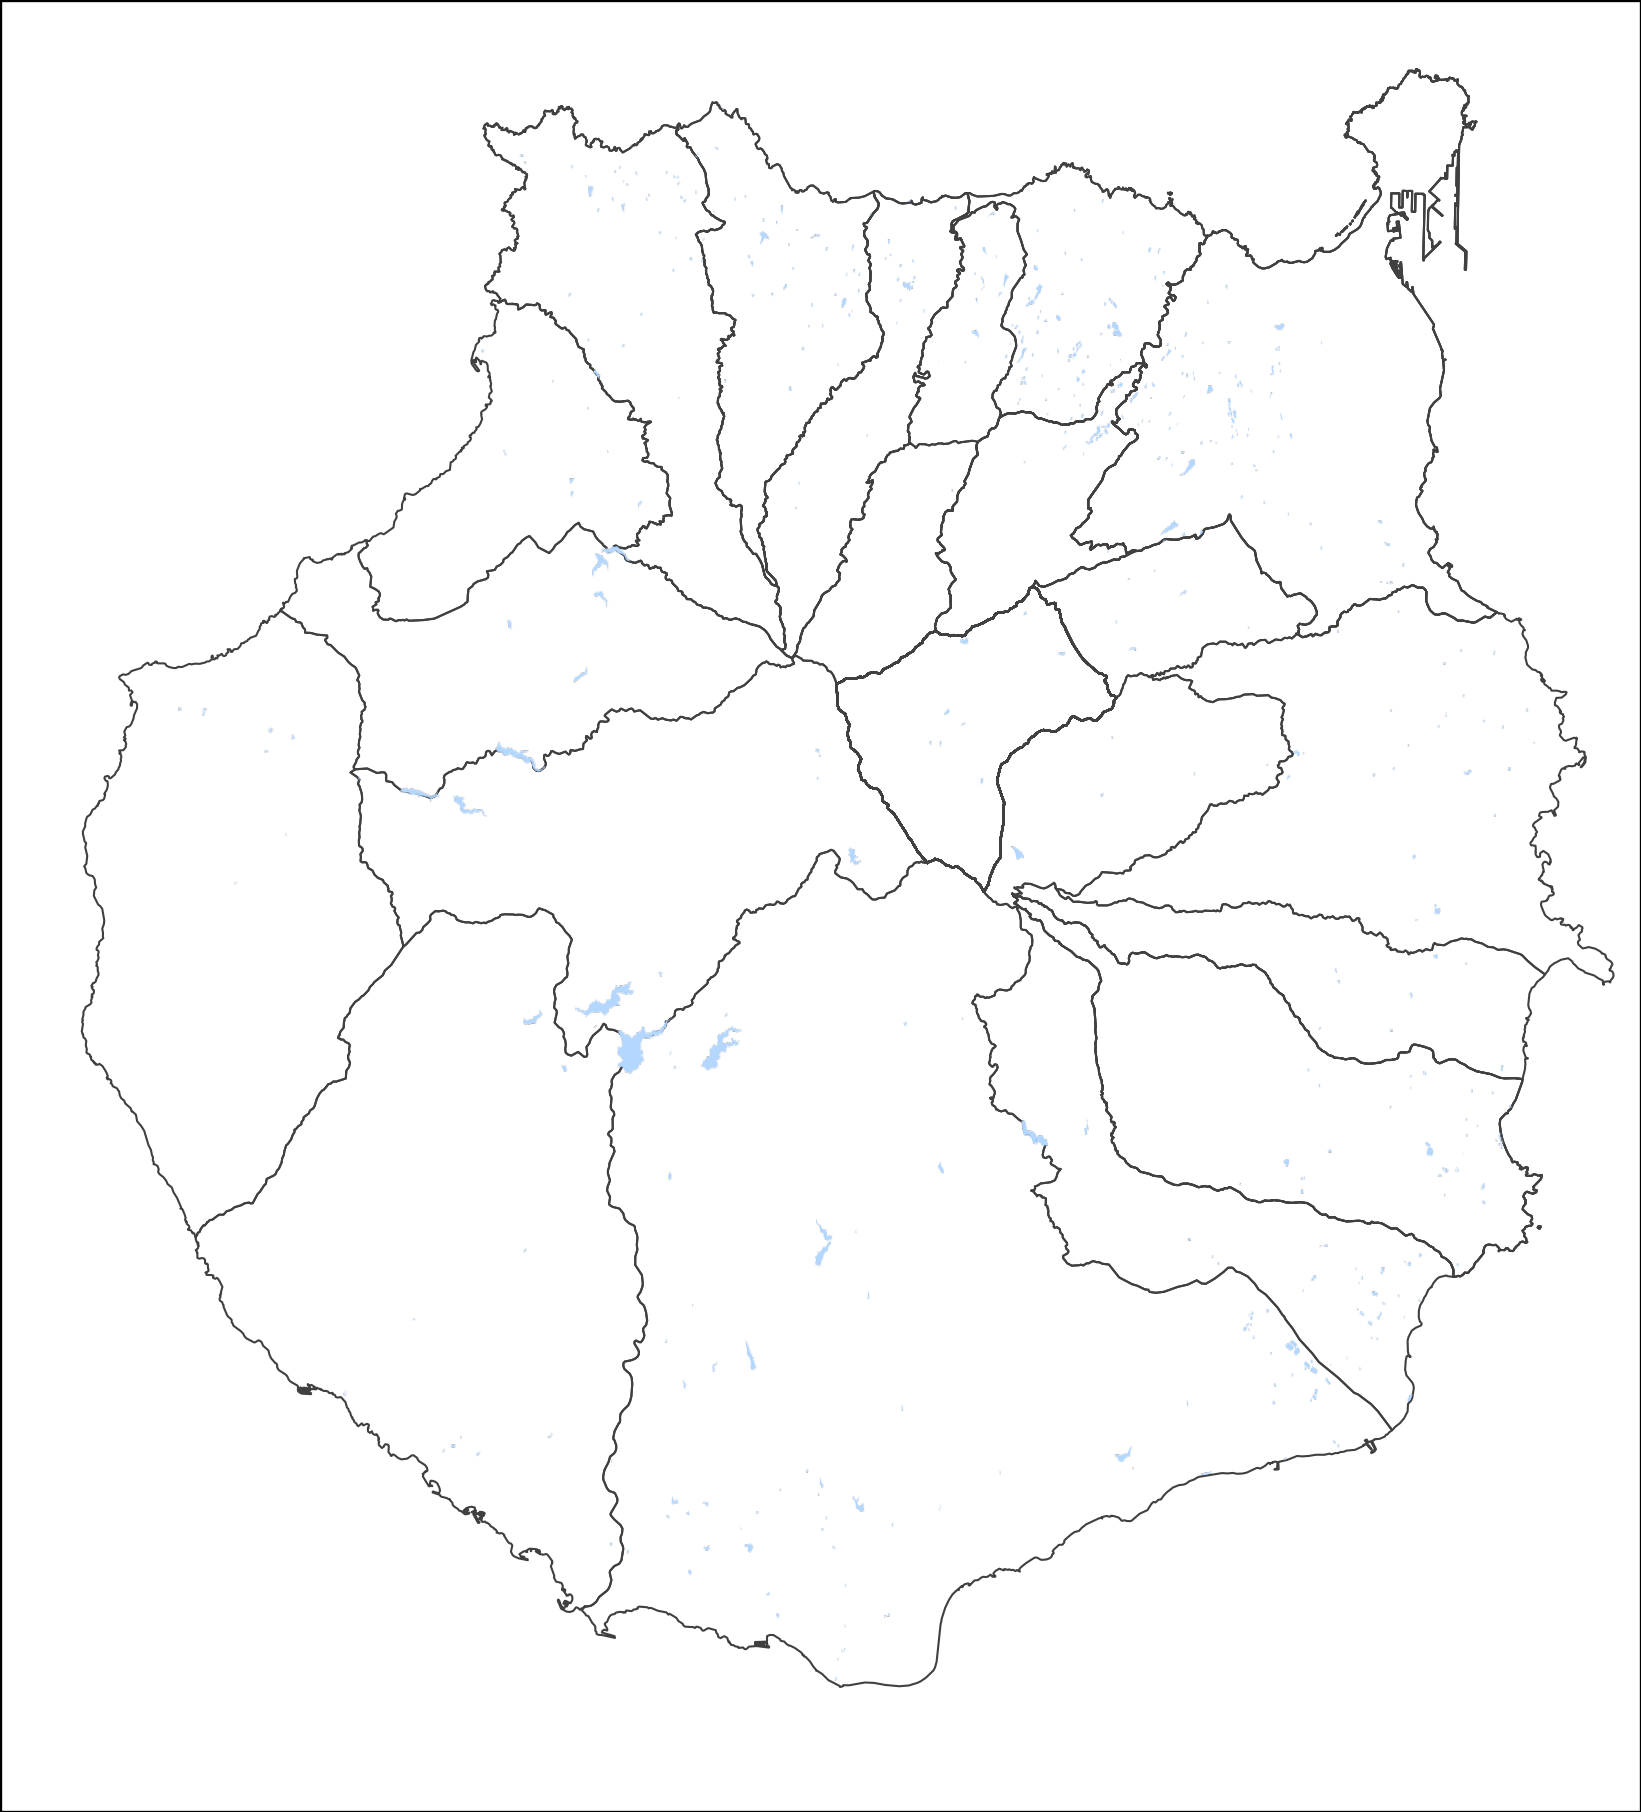

In [17]:
fig = plt.figure()
ax = plt.subplot(111, projection=hikinggc.main_crs)
municipios.add_to_plot(ax, color='.25', linewidth=.5, zorder=3)

ax.add_wms(wms='https://idecan2.grafcan.es/ServicioWMS/MTI?',
               layers=['HID'],
               transform=hikinggc.main_crs, zorder=3)

ax.set_extent(GC.coordinates)
ax.spines['geo'].set_color("w")
plt.savefig(os.path.join(hikinggc.figdir, "presas_contours.png"))
plt.show()
plt.close()